# **Modeling and simulation (Week 1)**

*   What is a system?
*   What is a model?
*   What is a simulation?
*   What are discrete and continuous variables?
*   What is the difference between deterministic and stochastic?

## **1D Random Walk**

A particle move in a 1D space: In one dimension the particle move up or down randomly with equal probability. The walks occurs for a given number of steps.

There is a reflecting barrier - if the particle collides with the reflecting barrier, the next step is up.  There is also an absorbing barrier - if the particle collides with the abasorbing barrier the walk ends (the particle disappears).

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/rwbarriers.png)

The input (independent) variables of the system: this is how you set up your system.

The output (dependent) variables of the system: this is what you observe according to the system setup.

What type of system are you modeling/observing?

## **Continuous Uniform Distribution**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/320px-Uniform_Distribution_PDF_SVG.svg.png)   
[Continuous uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

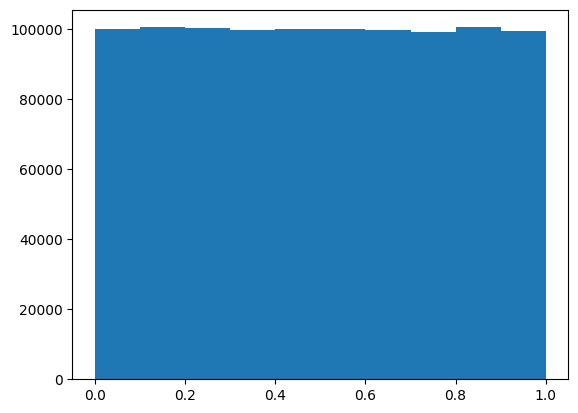

In [34]:
import numpy as np
import matplotlib.pyplot as plt

h = plt.hist(np.random.random(size=1000000))

In [35]:
(np.random.random(size=10) > 0.5).astype(int)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

## **Assignments**

**Assignment 1**: Complete the code for the function that generates a number +1 or -1 with uniform probability.

In [36]:
def random_value():
    ## WRITE YOUR CODE HERE
    dir = 2*(np.random.random() > 0.5) -1
    ## --------------------
    return dir

random_value()

1

**Assignment 2**: Complete the code for the funtion that generates a vector of N elements with +1 and -1 using a uniform distribution.

In [37]:
def random_vector(N):
    dir = 2*(np.random.random(N) > 0.5) -1
    return dir

random_vector(10)

array([-1,  1, -1, -1, -1,  1, -1,  1, -1, -1])

We can use this code for visualizing a non-limited random walk.

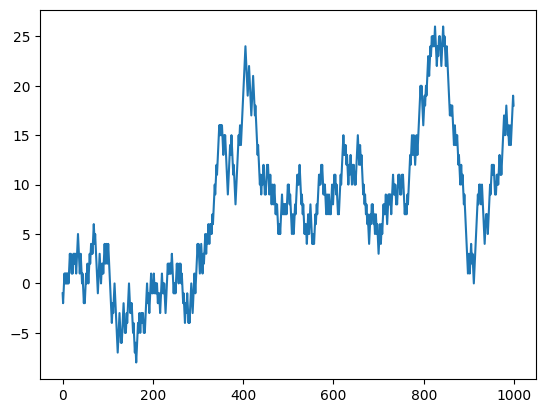

In [38]:
p = plt.plot(random_vector(1000).cumsum())

**Assignment 3**: Complete the code for the function that generates a 1D random walk.

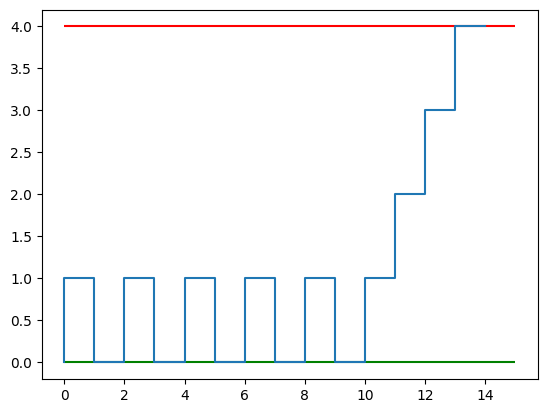

In [39]:
def make_walk(absorbing_barrier, reflecting_barrier=0, start=0):
    walk = [start]
    ## WRITE YOUR CODE HERE
    while walk[-1] != absorbing_barrier:
        if walk[-1] <= reflecting_barrier:
            walk.append(walk[-1] + 1)
        else:
            walk.append(walk[-1] + random_value())
    
    return walk
        

absorbing_barrier = 4
walk = make_walk(absorbing_barrier)

plt.hlines(0, 0, len(walk), colors='g')
plt.hlines(absorbing_barrier, 0, len(walk), colors='r')
s = plt.step(range(len(walk)), walk)

In [40]:
walk = make_walk(absorbing_barrier)
print(walk, " - ", len(walk))

[0, 1, 2, 3, 4]  -  5


**Assignment 4**: Complete the code for the function that computes the average walk for a given absorbing barrier.

In [41]:
def average_steps(absorbing_barrier=4, num_trials=1000):
    ## WRITE YOUR CODE HERE
    for i in walk:
        value = np.mean([len(make_walk(absorbing_barrier)) for i in range(num_trials)])
    ## --------------------
    return value

average_steps(absorbing_barrier=4, num_trials=10000)

17.0

Let's compare with its theoretical average walk.

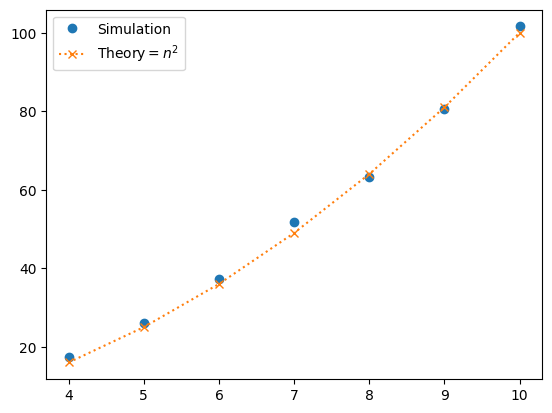

In [42]:
n = np.array([4, 5, 6, 7, 8, 9, 10])
mw = []  # mean life
for ni in n:
    mw.append(average_steps(absorbing_barrier=ni))
plt.plot(n, mw, "o", label="Simulation")  # Simulation
plt.plot(n, n**2, ":x", label=r"Theory$=n^2$")  # Theory
plt.legend();

## **Final Analysis**

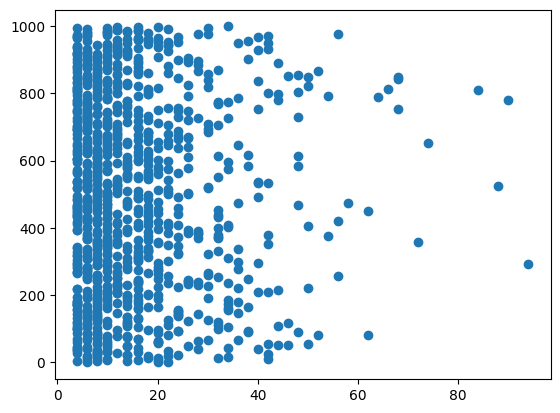

In [43]:
walk_n4 = np.array([len(make_walk(absorbing_barrier=4)) - 1 for i in range(1000)])
w = plt.plot(walk_n4, range(len(walk_n4)), 'o')

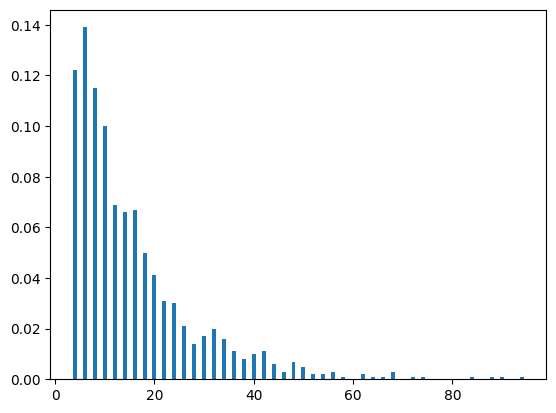

In [44]:
x, fx = np.unique(walk_n4, return_counts=True)
b = plt.bar(x, fx/fx.sum())

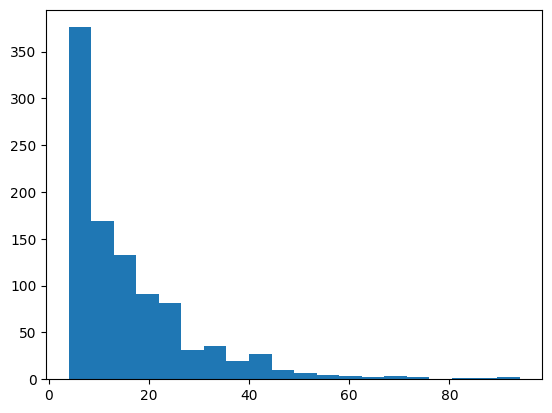

In [45]:
h = plt.hist(walk_n4, bins=20)

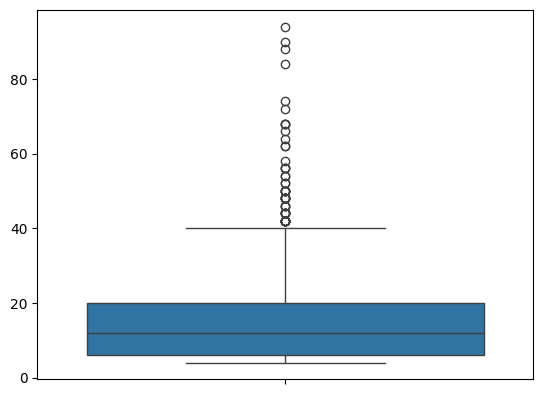

In [46]:
import seaborn as sns
bp = sns.boxplot(walk_n4)

**Assignment 5**: What is the minimum and maximum number of steps in 100000 executions when `absorbing_barrier=4`?

In [50]:
## WRITE YOUR CODE HERE
num_steps_list = [len(make_walk(absorbing_barrier)) - 1 for _ in range(100000)]

# Calculamos el mínimo y el máximo número de pasos.
min_steps = min(num_steps_list)
max_steps = max(num_steps_list)

print("Mínimo número de pasos: ", min_steps)
print("Máximo número de pasos: ", max_steps)
## --------------------

Mínimo número de pasos:  4
Máximo número de pasos:  144


**Assignment 6**: Is the behavior observed with `absorbing_barrier=4` the same as the behavior that can be observed with `absorbing_barrier` in `[5, 6, 7, 8]`? What are the main differences and similarities in each case?

In [52]:
# Valores de absorbing_barrier que deseas comparar
absorbing_barriers = [4, 5, 6, 7, 8]

for barrier in absorbing_barriers:
    # Simular 100,000 ejecuciones para cada valor de absorbing_barrier
    num_steps_list = [len(make_walk(barrier)) - 1 for _ in range(100000)]
    
    # Calculamos el mínimo y el máximo número de pasos para el valor actual de absorbing_barrier
    min_steps = min(num_steps_list)
    max_steps = max(num_steps_list)
    
    print("Para absorbing_barrier= ", barrier, "->")
    print("Mínimo número de pasos: ", min_steps)
    print("Máximo número de pasos: ", max_steps)
    print()

Para absorbing_barrier=  4 : 
Mínimo número de pasos:  4
Máximo número de pasos:  138

Para absorbing_barrier=  5 : 
Mínimo número de pasos:  5
Máximo número de pasos:  243

Para absorbing_barrier=  6 : 
Mínimo número de pasos:  6
Máximo número de pasos:  314

Para absorbing_barrier=  7 : 
Mínimo número de pasos:  7
Máximo número de pasos:  485

Para absorbing_barrier=  8 : 
Mínimo número de pasos:  8
Máximo número de pasos:  568

